In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Fault Detection in Power System Transmission Lines

## 1. Introduction
   - **Objective**: Enhance fault detection and classification in transmission lines using machine learning models.
   - **Context**: Overview of the importance of fault detection in power systems.
   - **Data Source**: Description of the dataset, including features such as current and voltage readings, and fault indicators.

## 2. Dataset Description
**Data Source:kaggle datasets download -d esathyaprakash/electrical-fault-detection-and-classification**
   - **Loading Data**: Import the dataset and display initial records.
     - Dataset Columns: `G`, `C`, `B`, `A`, `Ia`, `Ib`, `Ic`, `Va`, `Vb`, `Vc`
   - **Data Overview**: Summary statistics and data types.
   - **Simulation Details**: Explanation of the power system model and fault types.

## 3. Data Preprocessing
   - **Data Cleaning**: Handle missing values and outliers.
   - **Feature Extraction**: Select and create relevant features for modeling.
     - Features: `G`, `C`, `B`, `A`, `Ia`, `Ib`, `Ic`, `Va`, `Vb`, `Vc`
   - **Normalization and Scaling**: Apply scaling techniques to standardize features.

## 4. Exploratory Data Analysis (EDA)
   - **Visualizing Fault Patterns**: Create plots to visualize patterns in fault indicators (`G`, `C`, `B`, `A`) and measurements (`Ia`, `Ib`, `Ic`, `Va`, `Vb`, `Vc`).
   - **Feature Analysis**: Analyze correlations between features and fault indicators.

## 5. Machine Learning Models
   - **Model Overview**: Introduction to the models used.
     - Models: Artificial Neural Networks (ANNs), Support Vector Machines (SVMs), Decision Trees, Random Forests
   - **Implementation**: Steps to implement ANNs, SVMs, Decision Trees, and Random Forests.
   - **Hyperparameter Tuning**: Techniques for optimizing model parameters.

## 6. Fault Detection and Classification
   - **Training and Evaluation**: Train models and evaluate their performance.
   - **Performance Metrics**: Calculate accuracy, precision, recall, and F1 score.
   - **Model Comparison**: Compare the results of different models.

## 7. Data Visualization Techniques
   - **Fault Detection Visualization**: Graphs and charts to illustrate fault detection results, such as confusion matrices and ROC curves.
   - **Model Performance Visualization**: Visual comparison of model performances using bar charts or other relevant plots.

## 8. Results and Discussion
   - **Summary of Findings**: Key insights from model evaluations, including which models performed best for detecting faults.
   - **Implications**: How the findings impact fault detection systems in power transmission lines.
   - **Limitations and Future Work**: Discuss any limitations encountered and suggest areas for future research.

## 9. Conclusion
   - **Key Takeaways**: Main conclusions drawn from the analysis and model performance.
   - **Recommendations**: Practical recommendations for implementing fault detection systems based on the results.
   - **Final Thoughts**: Summary of the project's contributions and impact.

## 10. References
   - **Literature and Resources**: List of references and resources used in the project.

## 11. Appendices
   - **Additional Data and Code**: Any supplementary data and code snippets not included in the main sections.
   - **Model Specifications**: Detailed specifications and configurations of the models used.
   - **Supplementary Materials**: Additional materials relevant to the project.


In [4]:
df = pd.read_csv('/content/sample_data/classData.csv')
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
G,7861.0,0.432006,0.495387,0.000000,0.000000,0.000000,1.000000,1.000000
C,7861.0,0.411271,0.492095,0.000000,0.000000,0.000000,1.000000,1.000000
B,7861.0,0.555527,0.496939,0.000000,0.000000,1.000000,1.000000,1.000000
A,7861.0,0.571429,0.494903,0.000000,0.000000,1.000000,1.000000,1.000000
Ia,7861.0,13.721194,464.741671,-883.542316,-119.802518,2.042805,227.246377,885.738571
Ib,7861.0,-44.845268,439.269195,-900.526951,-271.845947,5.513317,91.194282,889.868884
Ic,7861.0,34.392394,371.107412,-883.357762,-61.034219,-4.326711,49.115141,901.274261
Va,7861.0,-0.007667,0.289150,-0.620748,-0.130287,-0.005290,0.111627,0.595342
Vb,7861.0,0.001152,0.313437,-0.608016,-0.159507,0.001620,0.153507,0.627875
Vc,7861.0,0.006515,0.307897,-0.612709,-0.215977,0.009281,0.239973,0.600179


In [7]:
df.isna().sum()

,0
G,0
C,0
B,0
A,0
Ia,0
Ib,0
Ic,0
Va,0
Vb,0
Vc,0


we do not have a null value in our dataset.

#### Fault Visualisation

Text(0.5, 1.0, 'Ground Fault')

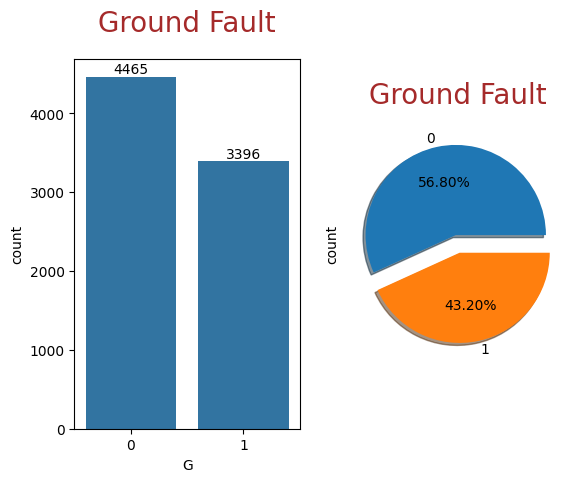

In [8]:
ax = plt.subplot (1,2,1)
ax = sns.countplot(x = 'G', data = df)
ax.bar_label(ax.containers[0])
plt.title('Ground Fault', fontsize = 20, color='brown', pad=20)

ax = plt.subplot (1,2,2)
ax = df['G'].value_counts().plot.pie(explode = [0.1,0.1], autopct = '%1.2f%%', shadow = True)
ax.set_title('Ground Fault', fontsize = 20, color='brown', pad=20)

Text(0.5, 1.0, 'Line A Fault')

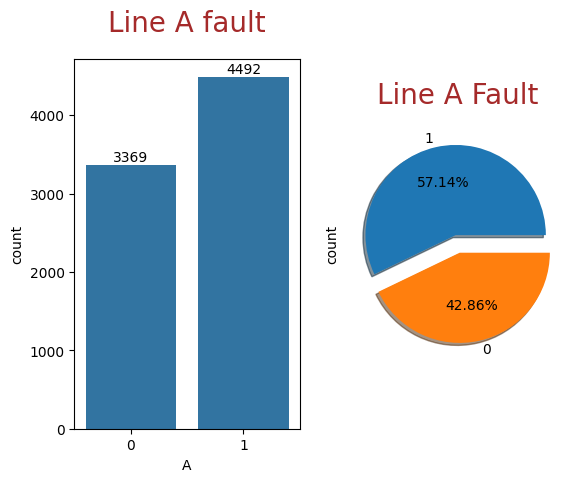

In [9]:
ax = plt.subplot (1,2,1)
ax = sns.countplot(x = 'A', data = df)
ax.bar_label(ax.containers[0])
plt.title('Line A fault', fontsize = 20, color='brown', pad=20)

ax = plt.subplot (1,2,2)
ax = df['A'].value_counts().plot.pie(explode = [0.1,0.1], autopct = '%1.2f%%', shadow = True)
ax.set_title('Line A Fault', fontsize = 20, color='brown', pad=20)

Text(0.5, 1.0, 'Line B Fault')

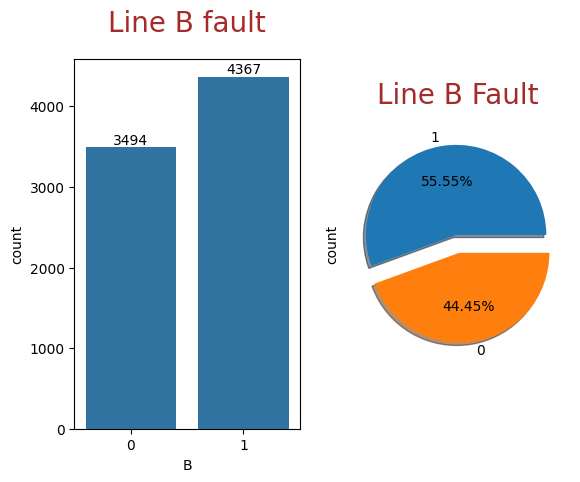

In [10]:
ax = plt.subplot (1,2,1)
ax = sns.countplot(x = 'B', data = df)
ax.bar_label(ax.containers[0])
plt.title('Line B fault', fontsize = 20, color='brown', pad=20)

ax = plt.subplot (1,2,2)
ax = df['B'].value_counts().plot.pie(explode = [0.1,0.1], autopct = '%1.2f%%', shadow = True)
ax.set_title('Line B Fault', fontsize = 20, color='brown', pad=20)

Text(0.5, 1.0, 'Line C Fault')

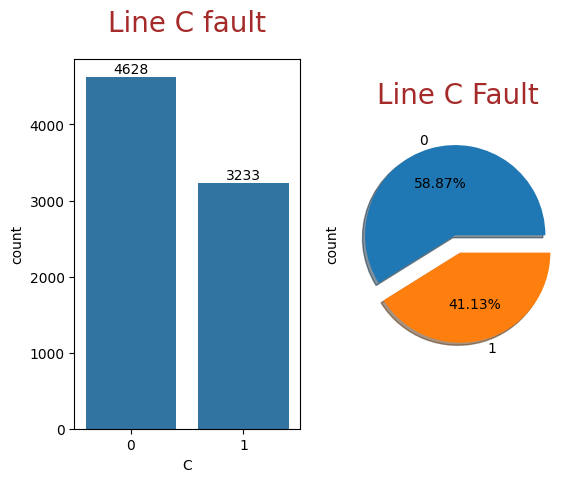

In [11]:
ax = plt.subplot (1,2,1)
ax = sns.countplot(x = 'C', data = df)
ax.bar_label(ax.containers[0])
plt.title('Line C fault', fontsize = 20, color='brown', pad=20)

ax = plt.subplot (1,2,2)
ax = df['C'].value_counts().plot.pie(explode = [0.1,0.1], autopct = '%1.2f%%', shadow = True)
ax.set_title('Line C Fault', fontsize = 20, color='brown', pad=20)

In [12]:
df_class = df.copy()

In [13]:
df_class['Fault_Type'] = df_class['G'].astype('str') + df_class['C'].astype('str') + df_class['B'].astype('str') + df_class['A'].astype('str')

In [14]:
df_class.head()


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [15]:
df = df_class.copy()

In [16]:
df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df['Fault_Type'][df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df['Fault_Type'][df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


In [17]:
df_new = df.copy()

In [18]:
df['Fault_Type'].value_counts(ascending=False)

,count
Fault_Type,
NO Fault,2365
Line A Line B to Ground Fault,1134
Line A Line B Line C to Ground Fault,1133
Line A to Ground Fault,1129
Line A Line B Line C,1096
Line B to Line C Fault,1004


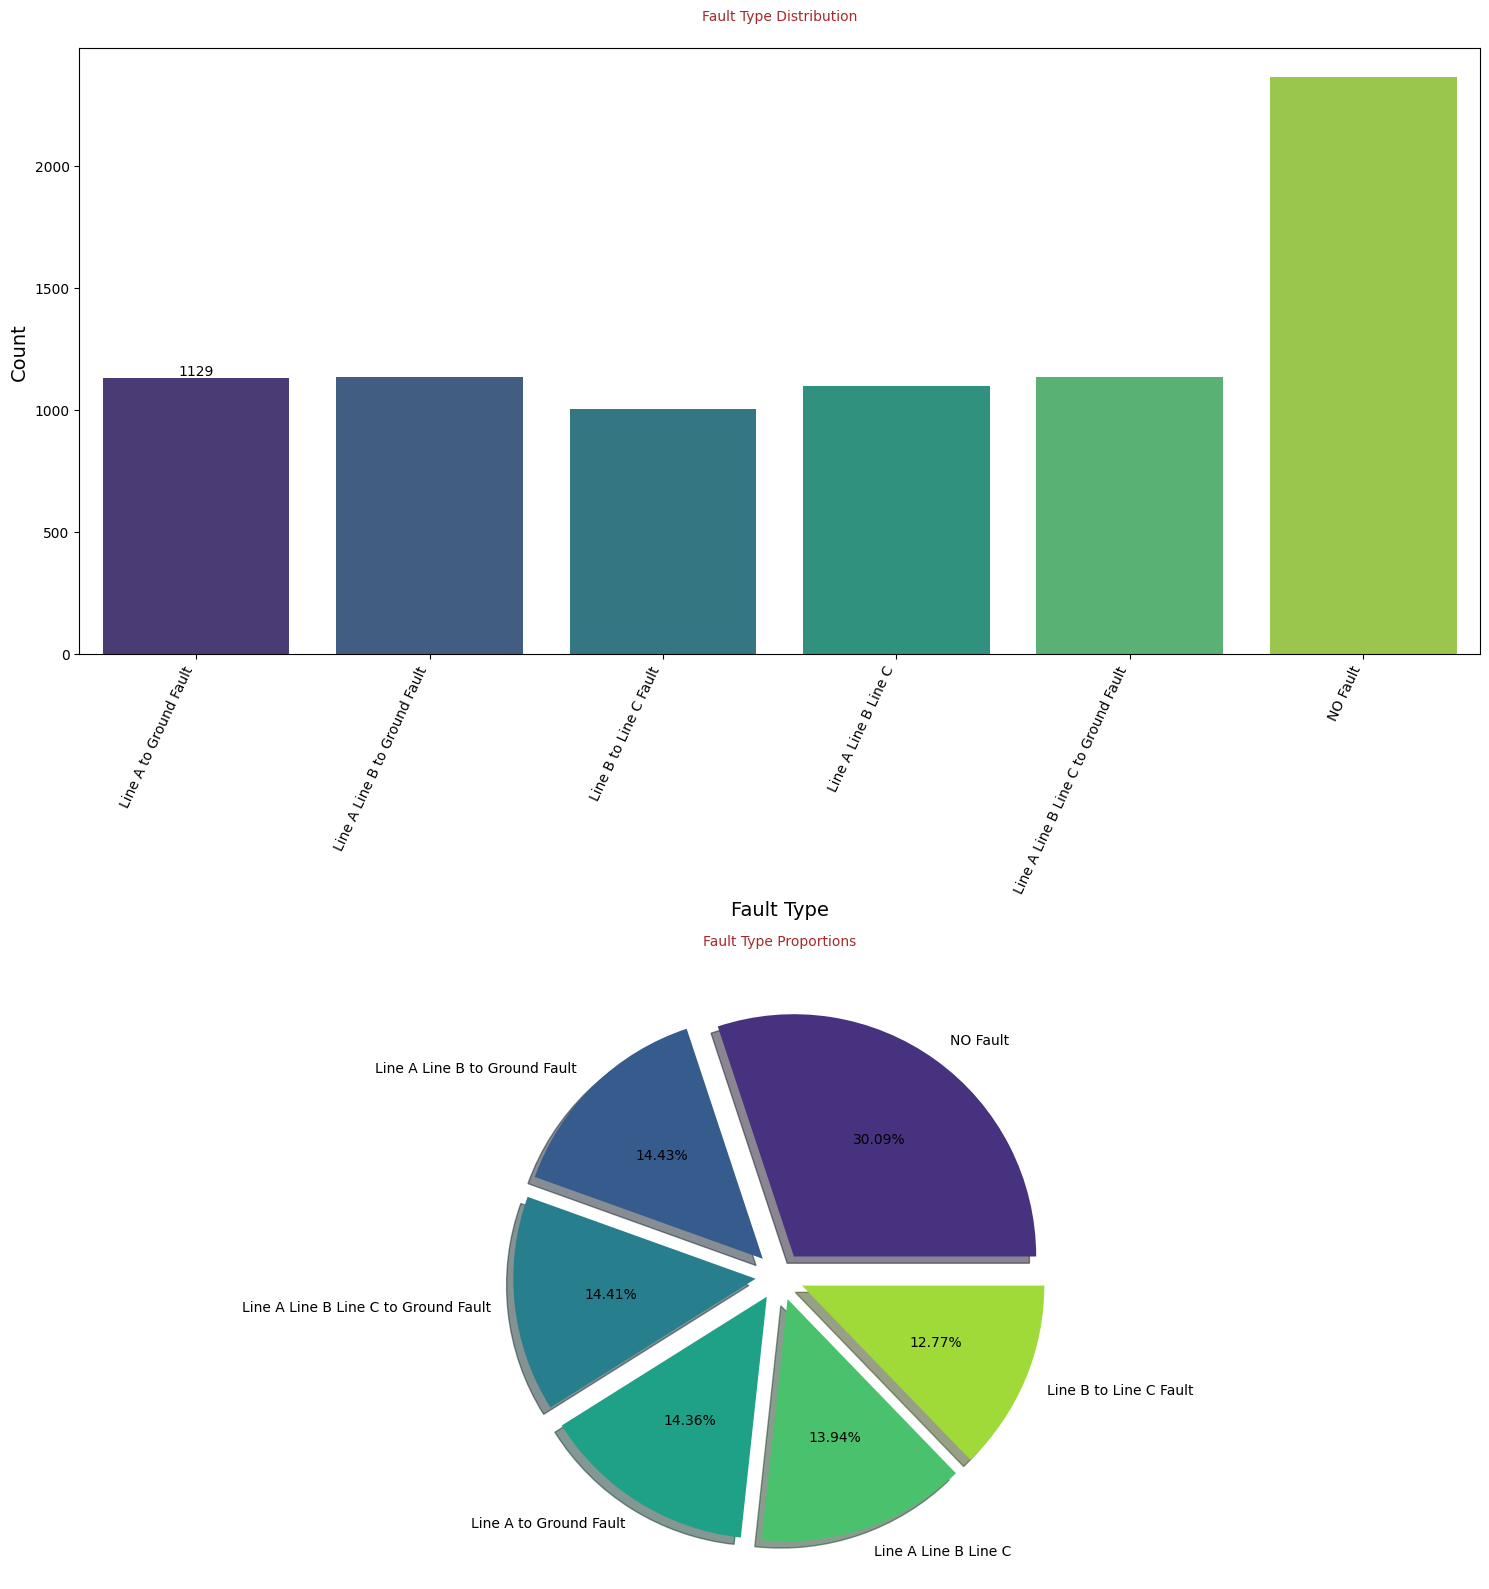

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
plt.figure(figsize=(15, 16))

# Plot for count of Fault Types
ax1 = plt.subplot(2, 1, 1)
sns.countplot(x='Fault_Type', data=df, palette='viridis', ax=ax1)
ax1.bar_label(ax1.containers[0])
ax1.set_title("Fault Type Distribution", fontsize=20, color='brown', font='Lucida Calligraphy', pad=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=65, ha='right')
ax1.set_xlabel('Fault Type', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

# Plot for pie chart of Fault Types
ax2 = plt.subplot(2, 1, 2)
df['Fault_Type'].value_counts().plot.pie(
    explode=[0.1] * len(df['Fault_Type'].value_counts()),
    autopct='%1.2f%%',
    shadow=True,
    colors=sns.color_palette('viridis', n_colors=len(df['Fault_Type'].value_counts())),
    ax=ax2
)
ax2.set_title("Fault Type Proportions", fontsize=20, color='brown', font='Lucida Calligraphy', pad=20)
ax2.set_ylabel('')  # Hide the y-label for pie chart
ax2.set_xlabel('')  # Hide the x-label for pie chart

# Adjust layout
plt.tight_layout()
plt.show()


#### Current Visualisation

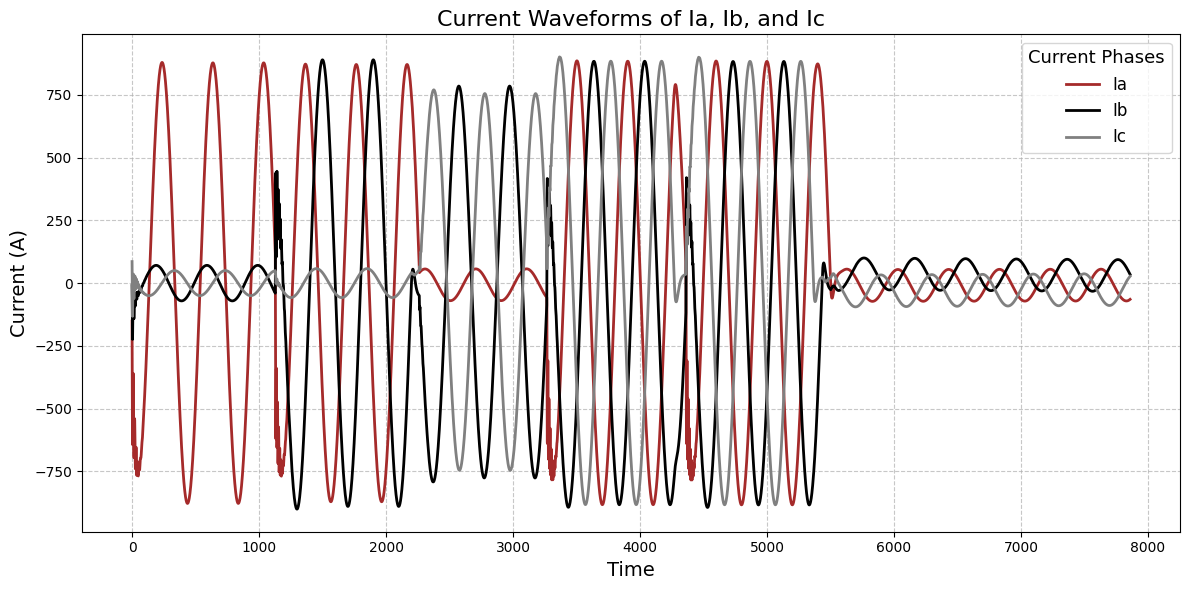

In [20]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot each current with specified colors
plt.plot(df['Ia'], label='Ia', color='brown',  linewidth=2)
plt.plot(df['Ib'], label='Ib', color='black',  linewidth=2)
plt.plot(df['Ic'], label='Ic', color='grey',  linewidth=2)

# Add labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Current (A)', fontsize=14)
plt.title('Current Waveforms of Ia, Ib, and Ic', fontsize=16)
plt.legend(title='Current Phases', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()



#### Voltage Visualisation

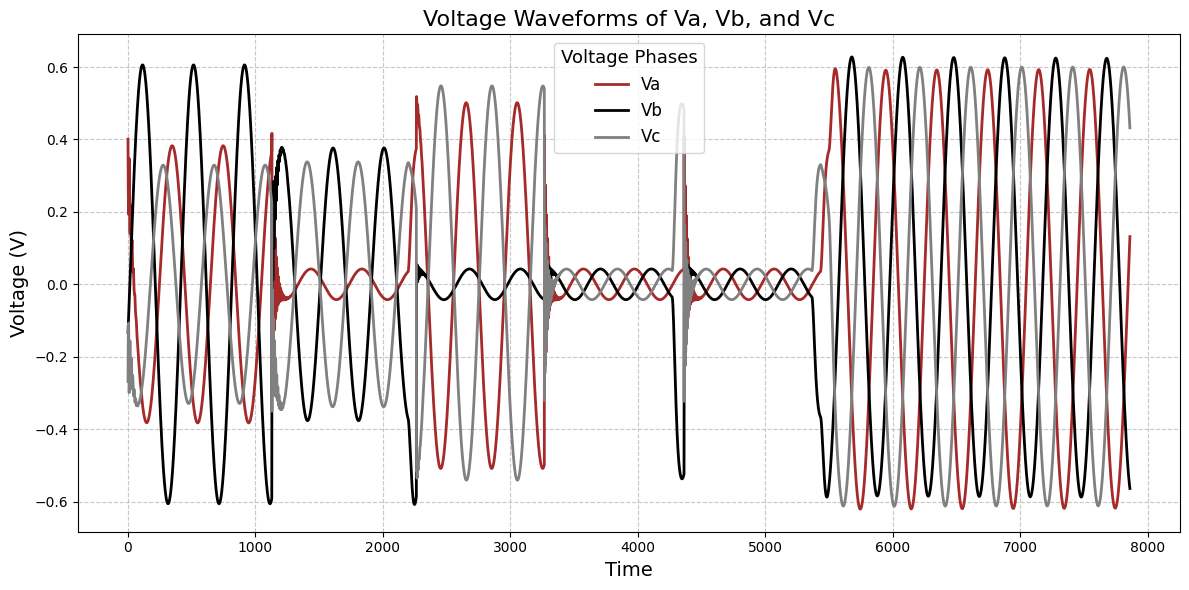

In [21]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot each voltage with specified colors
plt.plot(df['Va'], label='Va', color='brown',  linewidth=2)  # Phase 1
plt.plot(df['Vb'], label='Vb', color='black',  linewidth=2)  # Phase 2
plt.plot(df['Vc'], label='Vc', color='grey',  linewidth=2)  # Phase 3

# Add labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.title('Voltage Waveforms of Va, Vb, and Vc', fontsize=16)
plt.legend(title='Voltage Phases', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


*In the above voltage and current graphs, significant fluctuations or deviations from expected patterns often indicate the presence of faults. When you observe large variations or irregular spikes in these graphs, it is a strong indication that an electrical fault may have occurred. Such anomalies could suggest issues such as short circuits, line disconnections, or other disturbances in the electrical system. Identifying these fluctuations promptly is crucial for effective fault diagnosis and timely maintenance to ensure system stability and reliability.*

##### Analysing the system with no faults

In [22]:
no_fault = df[df['Fault_Type'] == 'NO Fault']
no_fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
5496,0,0,0,0,61.806321,-22.861987,21.102428,0.366320,-0.567179,0.200859,NO Fault
5497,0,0,0,0,48.041678,-23.401108,21.273066,0.367341,-0.564257,0.196916,NO Fault
5498,0,0,0,0,34.256533,-23.909263,21.408047,0.368258,-0.561168,0.192910,NO Fault
5499,0,0,0,0,20.464350,-24.396165,21.501503,0.369086,-0.557916,0.188830,NO Fault
5500,0,0,0,0,7.109677,-25.075888,21.341967,0.370321,-0.554505,0.184184,NO Fault


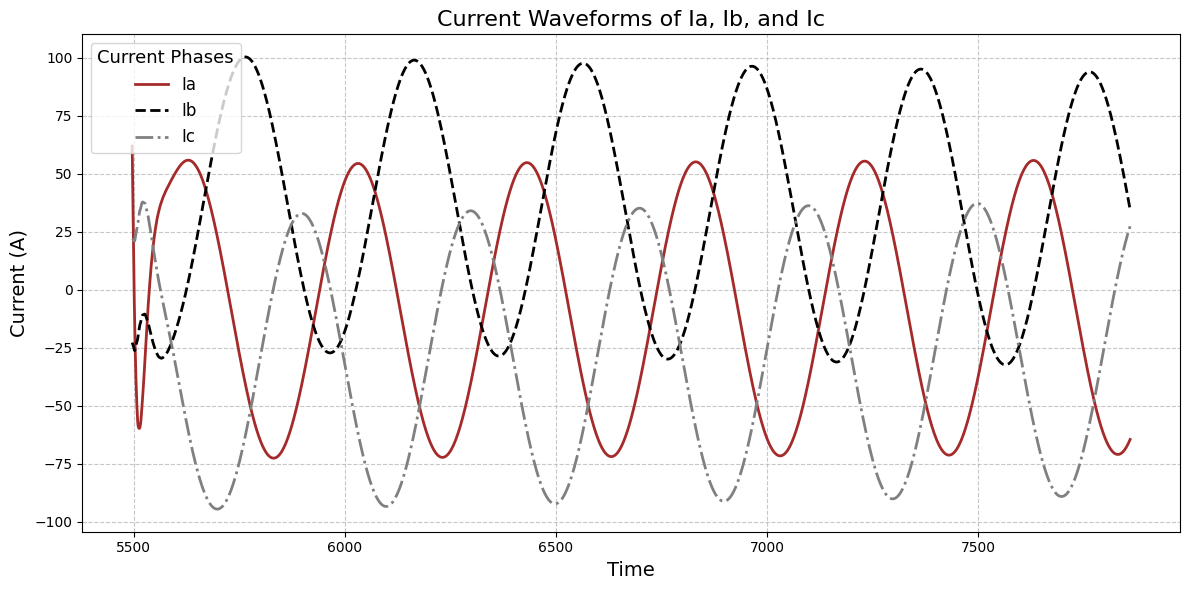

In [23]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot each current with specified colors
plt.plot(no_fault['Ia'], label='Ia', color='brown', linestyle='-', linewidth=2)
plt.plot(no_fault['Ib'], label='Ib', color='black', linestyle='--', linewidth=2)
plt.plot(no_fault['Ic'], label='Ic', color='grey', linestyle='-.', linewidth=2)

# Add labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Current (A)', fontsize=14)
plt.title('Current Waveforms of Ia, Ib, and Ic', fontsize=16)
plt.legend(title='Current Phases', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


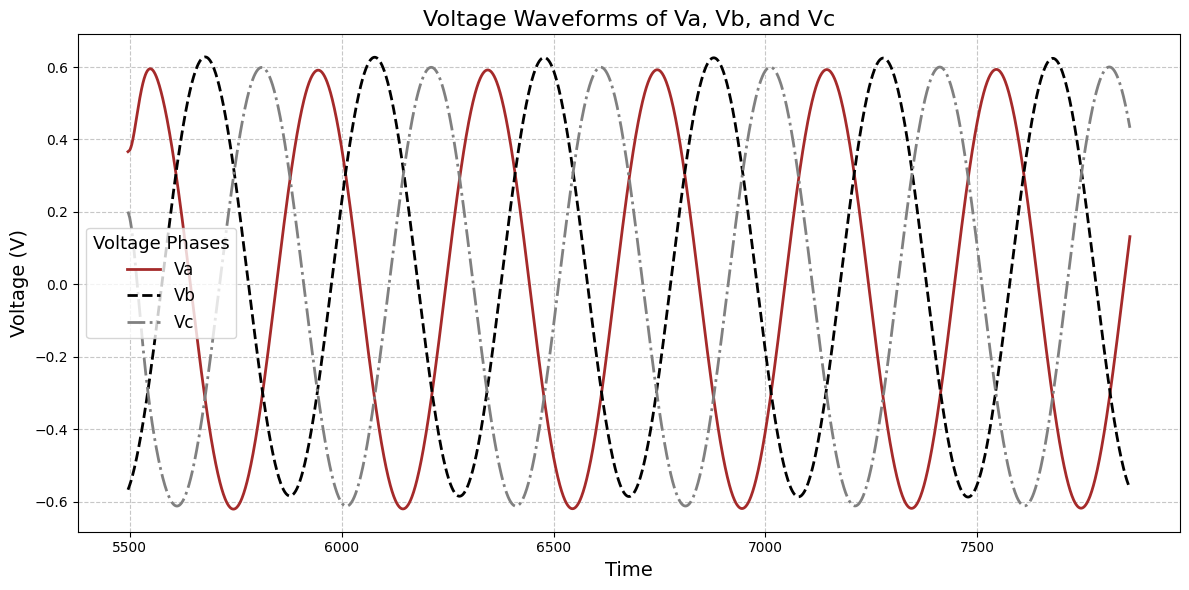

In [24]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot each voltage with specified colors
plt.plot(no_fault['Va'], label='Va', color='brown', linestyle='-', linewidth=2)  # Phase 1
plt.plot(no_fault['Vb'], label='Vb', color='black', linestyle='--', linewidth=2)  # Phase 2
plt.plot(no_fault['Vc'], label='Vc', color='grey', linestyle='-.', linewidth=2)  # Phase 3

# Add labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.title('Voltage Waveforms of Va, Vb, and Vc', fontsize=16)
plt.legend(title='Voltage Phases', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


*In a fault-free (No_Fault) condition, the voltage and current graphs exhibit a symmetrical and sinusoidal waveform. In such conditions, the current and voltage signals are characterized by a 120-degree phase shift between the three phases. This phase shift is a fundamental feature of balanced three-phase systems.*

*Typically, the current waveform oscillates within a range of approximately +100 to -100 Amperes, while the voltage waveform fluctuates between +0.5 per unit (pu) and -0.5 pu. This symmetrical pattern reflects the stable operation of the electrical system and indicates that the phases are balanced and functioning correctly.*

In [25]:
Line_AG_Fault = df[df['Fault_Type'] == 'Line A to Ground Fault']
Line_AG_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


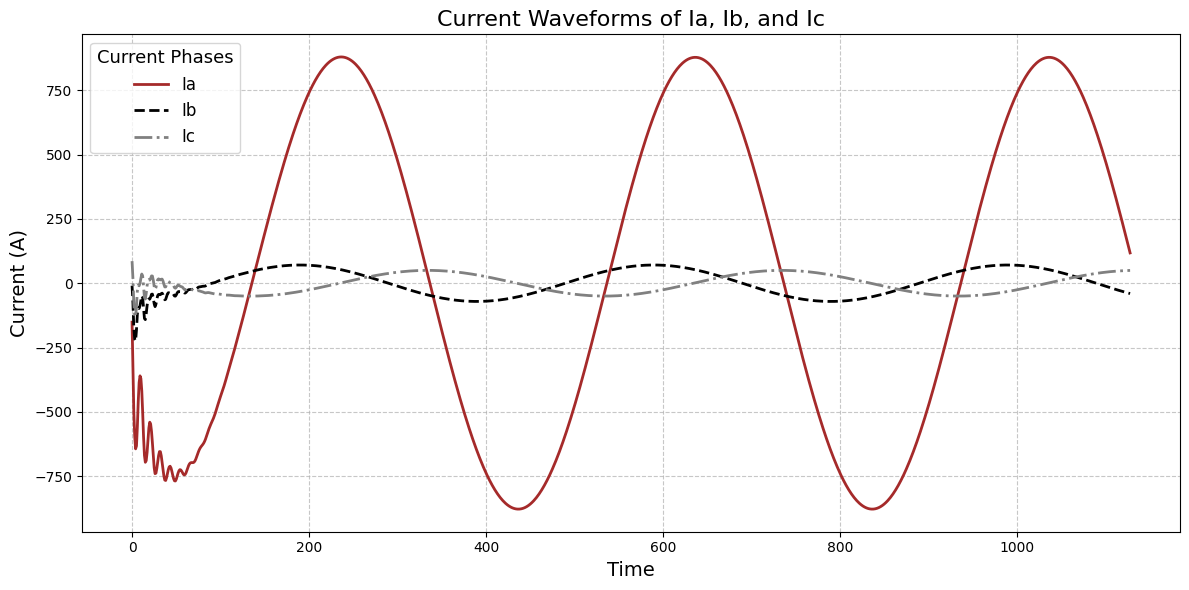

In [26]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot each current with specified colors
plt.plot(Line_AG_Fault['Ia'], label='Ia', color='brown', linestyle='-', linewidth=2)
plt.plot(Line_AG_Fault['Ib'], label='Ib', color='black', linestyle='--', linewidth=2)
plt.plot(Line_AG_Fault['Ic'], label='Ic', color='grey', linestyle='-.', linewidth=2)

# Add labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Current (A)', fontsize=14)
plt.title('Current Waveforms of Ia, Ib, and Ic', fontsize=16)
plt.legend(title='Current Phases', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


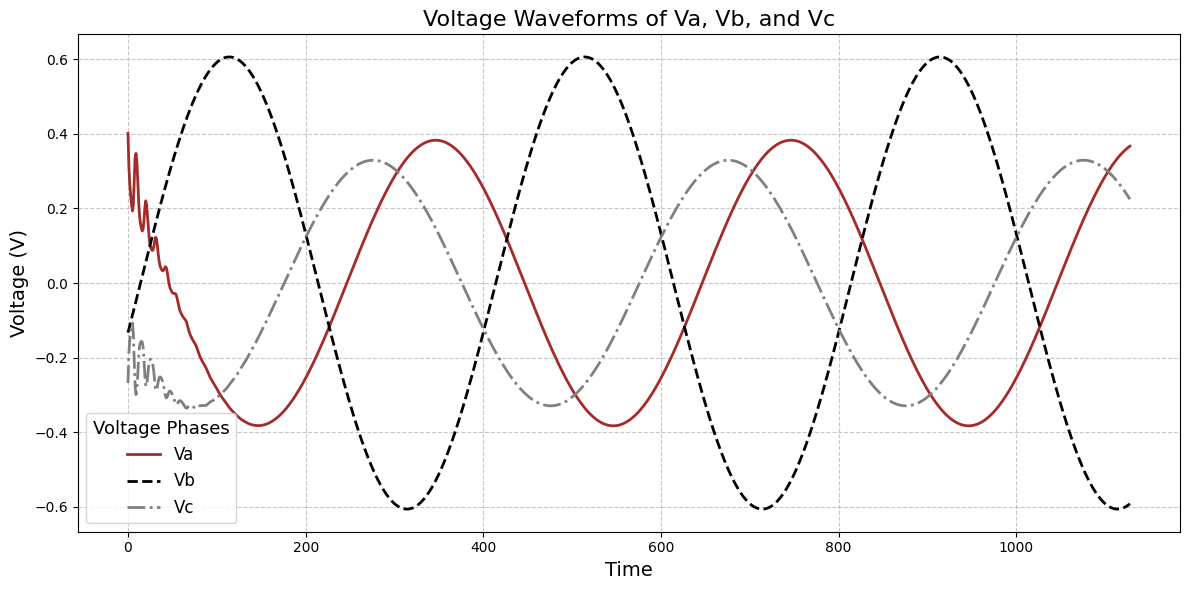

In [27]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot each voltage with specified colors
plt.plot(Line_AG_Fault['Va'], label='Va', color='brown', linestyle='-', linewidth=2)  # Phase 1
plt.plot(Line_AG_Fault['Vb'], label='Vb', color='black', linestyle='--', linewidth=2)  # Phase 2
plt.plot(Line_AG_Fault['Vc'], label='Vc', color='grey', linestyle='-.', linewidth=2)  # Phase 3

# Add labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Voltage (V)', fontsize=14)
plt.title('Voltage Waveforms of Va, Vb, and Vc', fontsize=16)
plt.legend(title='Voltage Phases', title_fontsize='13', fontsize='12')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


*During a Line A-to-ground fault, the current in Line A surges by a factor of 10, reaching approximately 1000 amperes from its normal value of 100 amperes, while the voltage drops significantly.*

In [28]:
Line_ABG_Fault = df[df['Fault_Type'] == 'Line A Line B to Ground Fault']
Line_ABG_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1129,1,0,1,1,-83.713374,42.102812,38.015631,0.416930,-0.066439,-0.350491,Line A Line B to Ground Fault
1130,1,0,1,1,-304.258650,243.536374,42.670680,0.097053,0.089765,-0.186818,Line A Line B to Ground Fault
1131,1,0,1,1,-487.104324,377.325956,29.573282,-0.132447,0.203226,-0.070779,Line A Line B to Ground Fault
1132,1,0,1,1,-603.543045,439.399623,9.638569,-0.248609,0.263483,-0.014873,Line A Line B to Ground Fault
1133,1,0,1,1,-620.718849,423.222790,0.613787,-0.226918,0.254651,-0.027733,Line A Line B to Ground Fault


In [29]:
import matplotlib.pyplot as plt

def plot_waveforms(df):
    """
    Plots current and voltage waveforms for phases Ia, Ib, Ic, Va, Vb, and Vc using a given DataFrame.

    Parameters:
    - df: The DataFrame containing the current and voltage data.
           It is assumed that the DataFrame contains columns: 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'.
           The index of the DataFrame will be used as the time axis.
    """

    # Plot current waveforms
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Ia'], label='Ia', color='brown', linestyle='-', linewidth=2)
    plt.plot(df.index, df['Ib'], label='Ib', color='black', linestyle='--', linewidth=2)
    plt.plot(df.index, df['Ic'], label='Ic', color='grey', linestyle='-.', linewidth=2)

    # Add labels and title for current
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Current (A)', fontsize=14)
    plt.title('Current Waveforms of Ia, Ib, and Ic', fontsize=16)
    plt.legend(title='Current Phases', title_fontsize='13', fontsize='12')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Display the current waveform plot
    plt.tight_layout()
    plt.show()

    # Plot voltage waveforms
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Va'], label='Va', color='brown', linestyle='-', linewidth=2)
    plt.plot(df.index, df['Vb'], label='Vb', color='black', linestyle='--', linewidth=2)
    plt.plot(df.index, df['Vc'], label='Vc', color='grey', linestyle='-.', linewidth=2)

    # Add labels and title for voltage
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Voltage (V)', fontsize=14)
    plt.title('Voltage Waveforms of Va, Vb, and Vc', fontsize=16)
    plt.legend(title='Voltage Phases', title_fontsize='13', fontsize='12')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Display the voltage waveform plot
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_waveforms(Line_AG_Fault)


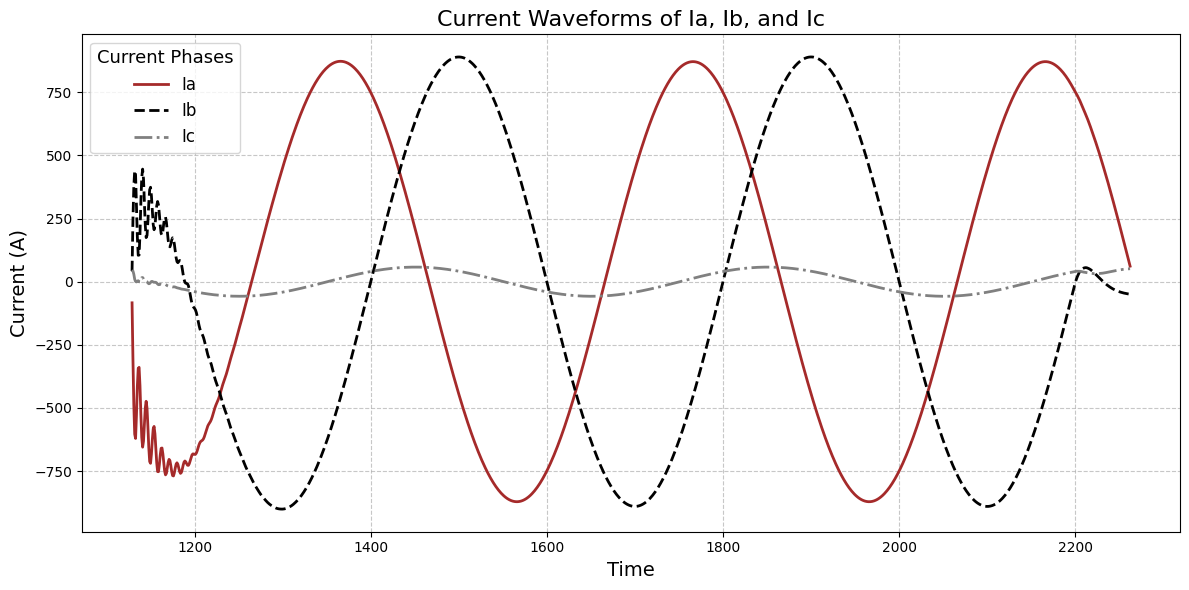

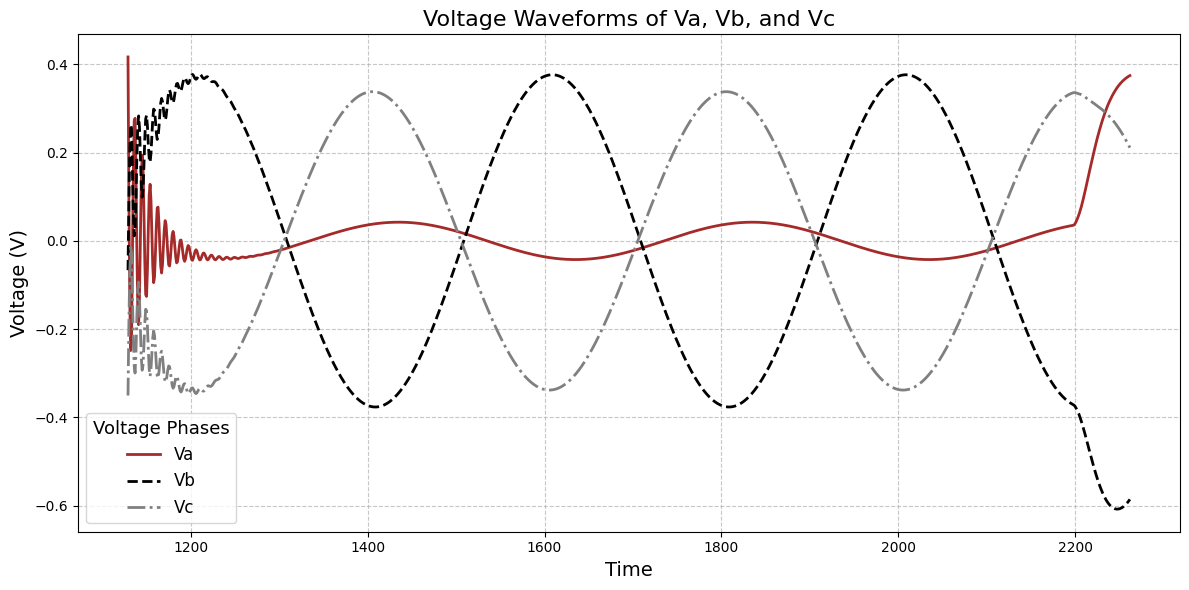

In [30]:
plot_waveforms(Line_ABG_Fault)

In [31]:
Line_BC_Fault = df[df['Fault_Type'] == 'Line B to Line C Fault']
Line_BC_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


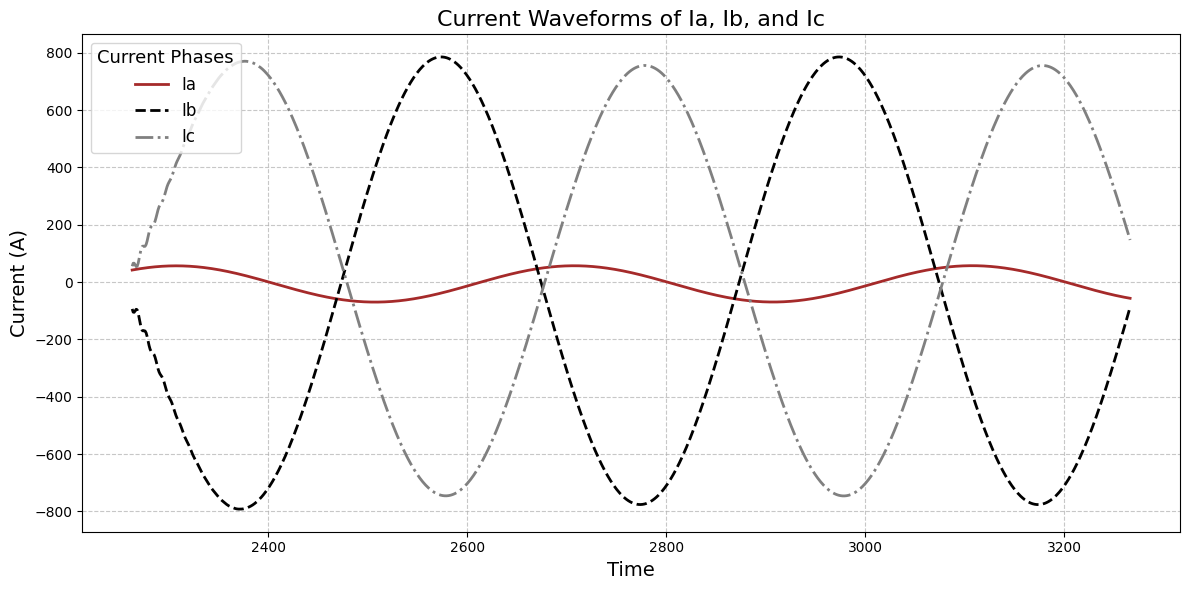

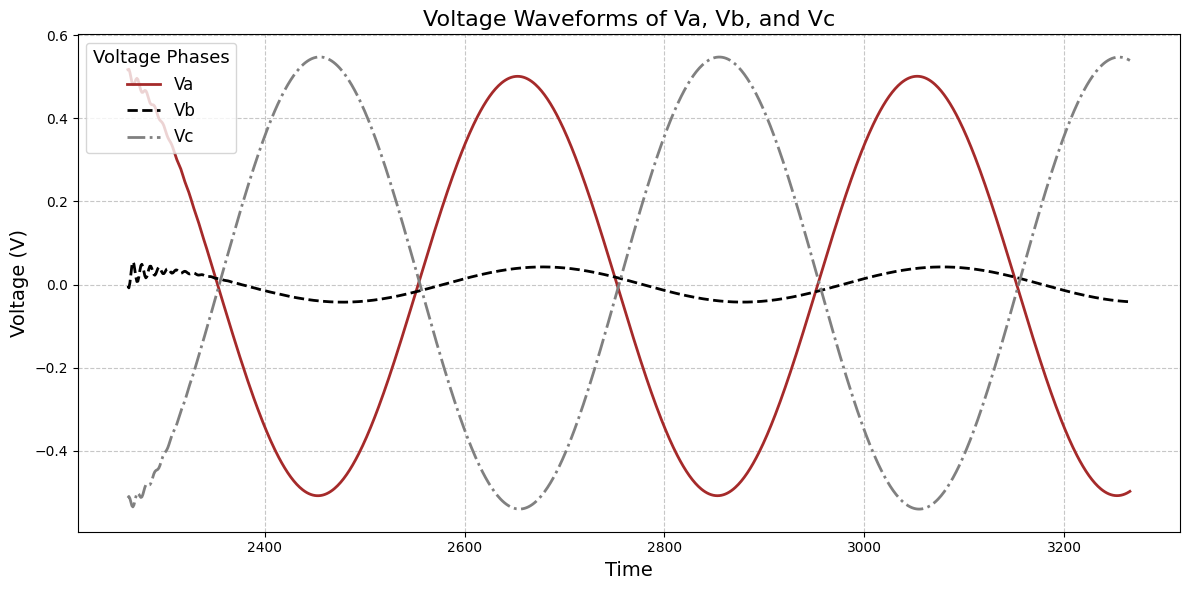

In [32]:
plot_waveforms(Line_BC_Fault)

In [33]:
Line_ABC_Fault = df[df['Fault_Type'] == 'Line A Line B Line C']
Line_ABC_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C


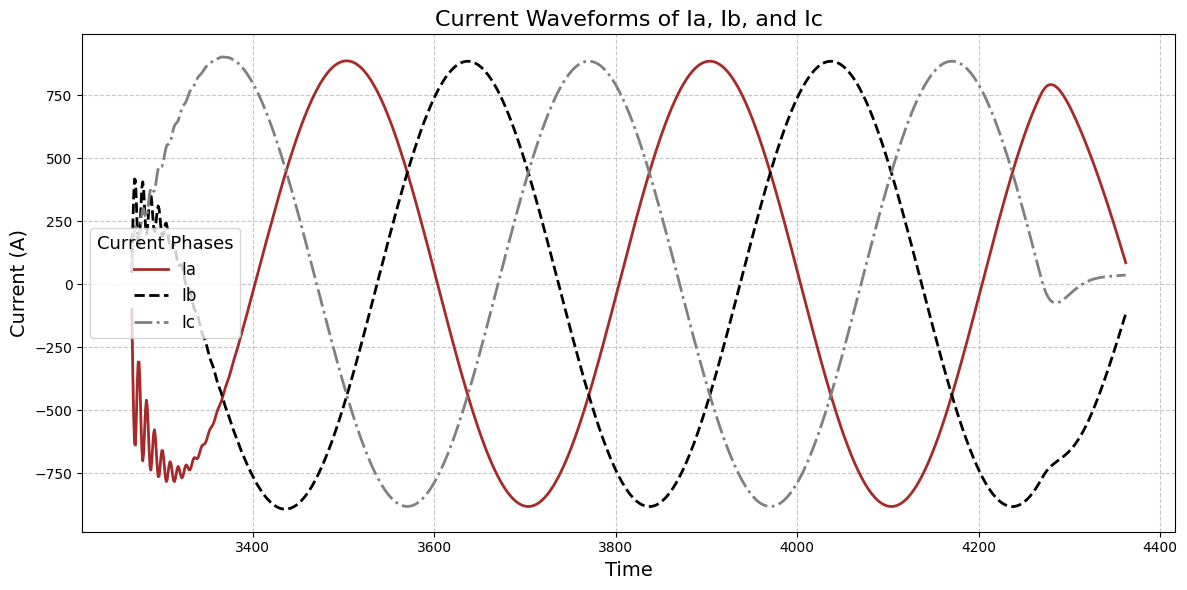

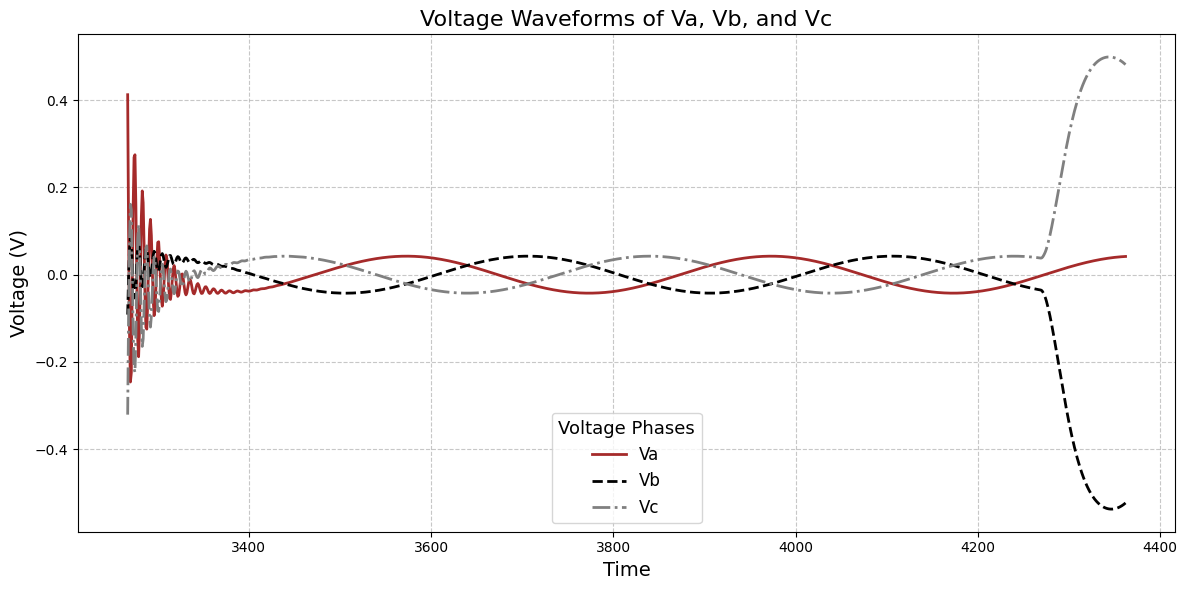

In [34]:
plot_waveforms(Line_ABC_Fault)

In [35]:
Line_ABCG_Fault = df[df['Fault_Type'] == 'Line A Line B Line C to Ground Fault']
Line_ABCG_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


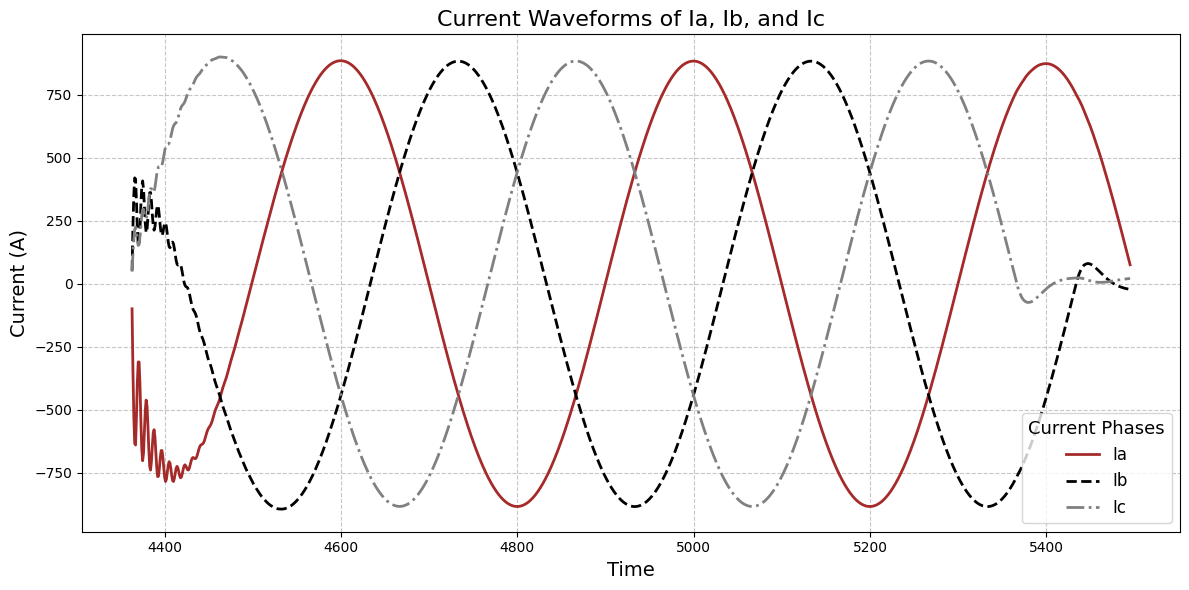

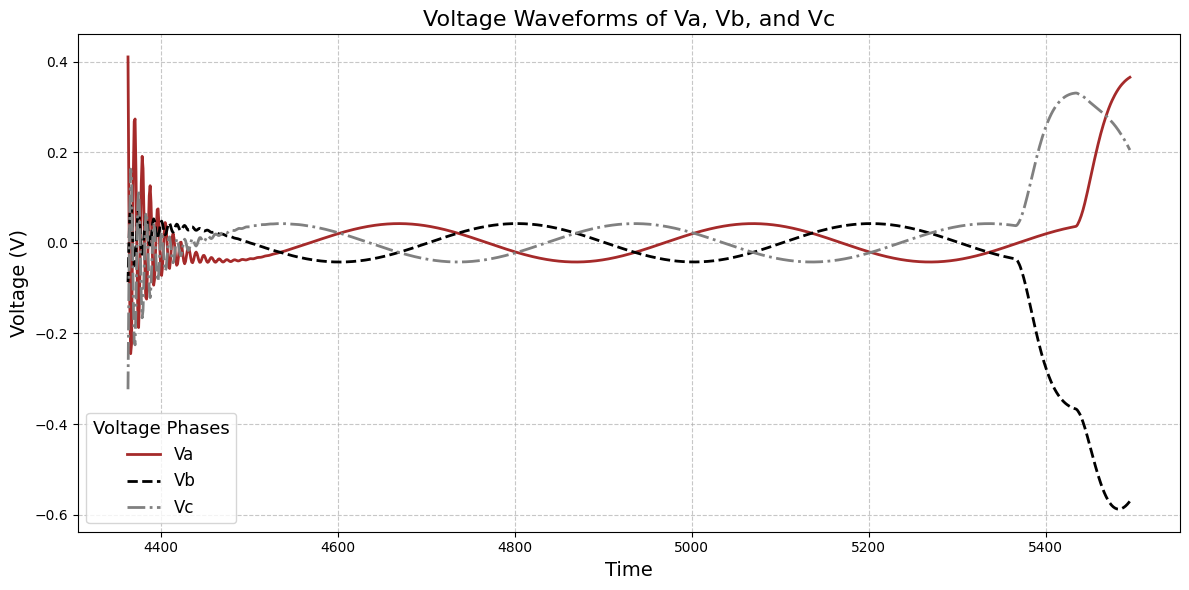

In [36]:
plot_waveforms(Line_ABCG_Fault)

### Feature and Label Separation

In [37]:
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Fault_Type'] = encoder.fit_transform(df['Fault_Type'])
df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [39]:
df1 = df.copy()
X = df1.drop(['Fault_Type', 'G', 'C', 'B','A'], axis=1)
y = df1['Fault_Type']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection

#### 1. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)

In [42]:
from sklearn.metrics import accuracy_score, classification_report
#Import confusion_matrix instead of plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def evaluate_model(logreg, X_train, y_train, X_test, y_test, y_pred_lr):
    """
    Evaluates a logistic regression model by displaying training accuracy, model accuracy,
    a classification report, and plotting a confusion matrix.

    Parameters:
    - logreg: The trained logistic regression model.
    - X_train: Features for the training set.
    - y_train: Target for the training set.
    - X_test: Features for the test set.
    - y_test: Target for the test set.
    - y_pred_lr: Predicted labels from the logistic regression model on the test set.
    """

    # Calculate accuracies
    log_train = round(logreg.score(X_train, y_train) * 100, 2)
    log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

    # Print the training and model accuracy
    print("Training Accuracy    :", log_train, "%")
    print("Model Accuracy Score :", log_accuracy, "%")
    print("\033[1m--------------------------------------------------------\033[0m")

    # Print the classification report
    print("Classification Report: \n", classification_report(y_test, y_pred_lr))
    print("\033[1m--------------------------------------------------------\033[0m")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred_lr)

    #Plot confusion matrix
    # Display the confusion matrix using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    # Add labels to the plot
    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Add text annotations to the plot
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Training Accuracy    : 35.8 %
Model Accuracy Score : 35.92 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.22      0.05      0.08       199
           1       0.39      0.13      0.20       211
           2       1.00      0.19      0.32       238
           3       0.00      0.00      0.00       242
           4       0.00      0.00      0.00       201
           5       0.34      1.00      0.51       482

    accuracy                           0.36      1573
   macro avg       0.32      0.23      0.18      1573
weighted avg       0.34      0.36      0.24      1573

--------------------------------------------------------


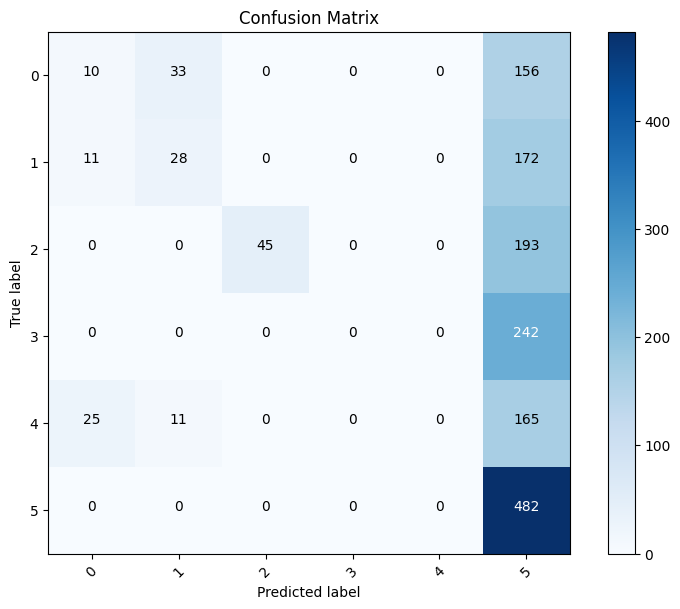

In [43]:
evaluate_model(logreg, X_train, y_train, X_test, y_test, y_pred)

#### Decison Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_train = round(dt.score(X_train, y_train) * 100, 2)
dt_accuracy = round(accuracy_score(y_pred_dt, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 89.64 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.63      0.61       199
           1       0.62      0.58      0.60       211
           2       0.99      1.00      0.99       238
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       482

    accuracy                           0.90      1573
   macro avg       0.87      0.87      0.87      1573
weighted avg       0.90      0.90      0.90      1573

--------------------------------------------------------


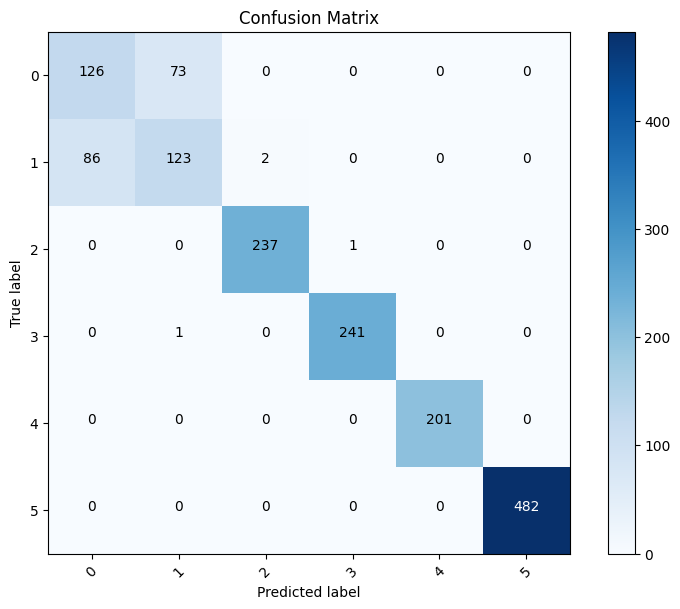

In [45]:
evaluate_model(dt, X_train, y_train, X_test, y_test, y_pred_dt)

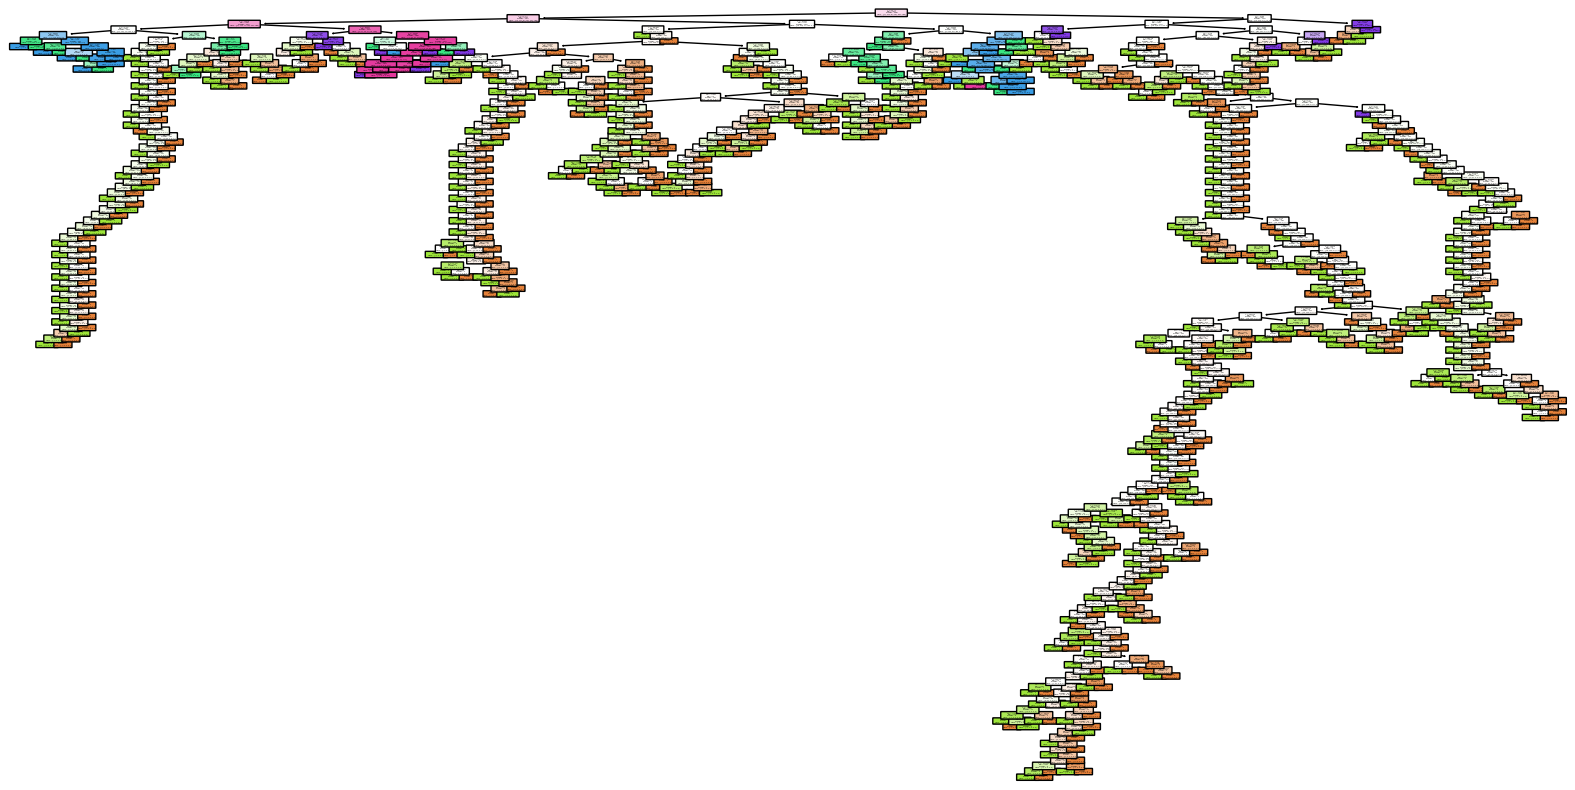

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault'], rounded=True)
plt.show()

#### 3. Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_train = round(rf.score(X_train, y_train) * 100, 2)
rf_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.81 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.60      0.58       199
           1       0.60      0.55      0.57       211
           2       1.00      0.99      0.99       238
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       482

    accuracy                           0.89      1573
   macro avg       0.86      0.86      0.86      1573
weighted avg       0.89      0.89      0.89      1573

--------------------------------------------------------


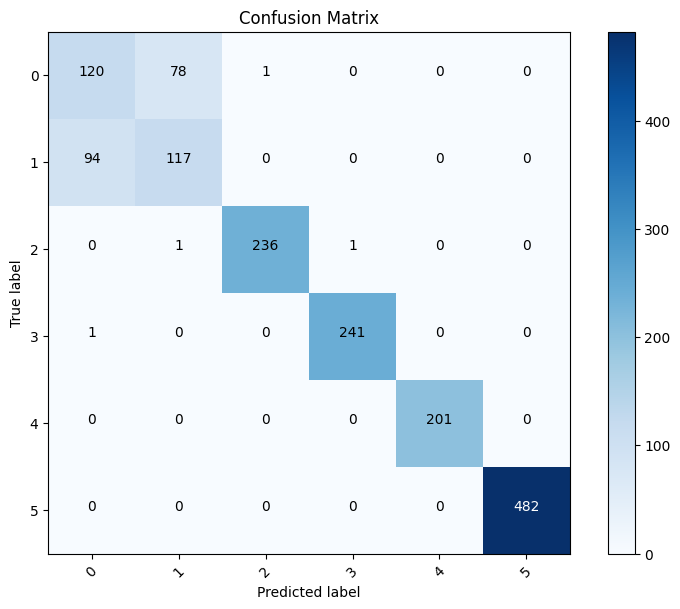

In [48]:
evaluate_model(rf, X_train, y_train, X_test, y_test, y_pred_rf)

#### 4. XGB Classifier

In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

Training Accuracy    : 92.88 %
Model Accuracy Score : 82.84 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.33      0.35      0.34       199
           1       0.36      0.35      0.35       211
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       242
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       482

    accuracy                           0.83      1573
   macro avg       0.78      0.78      0.78      1573
weighted avg       0.83      0.83      0.83      1573

--------------------------------------------------------


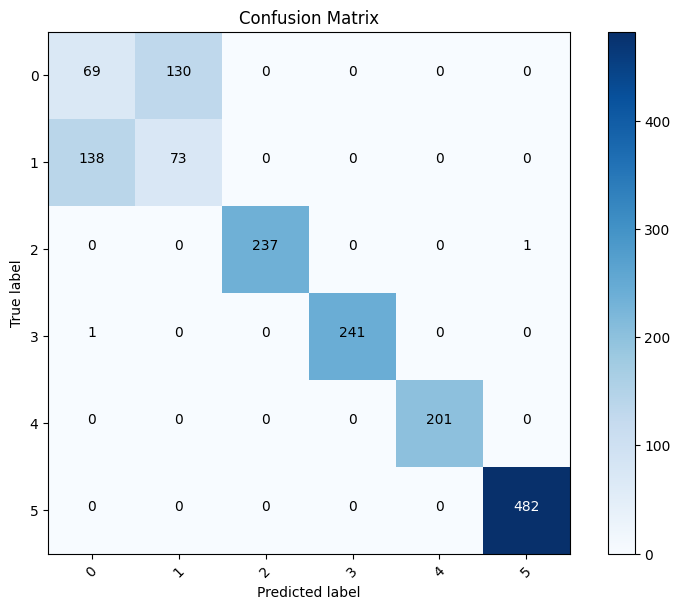

In [50]:
evaluate_model(xgb, X_train, y_train, X_test, y_test, y_pred_xgb)

#### 5. Support Vector Machines

In [51]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

svm_train = round(svm.score(X_train, y_train) * 100, 2)
svm_accuracy = round(accuracy_score(y_pred_svm, y_test) * 100, 2)

Training Accuracy    : 76.05 %
Model Accuracy Score : 75.97 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.52      0.50       199
           1       0.43      0.16      0.23       211
           2       0.76      0.79      0.78       238
           3       0.79      0.86      0.82       242
           4       0.80      0.89      0.84       201
           5       0.89      1.00      0.94       482

    accuracy                           0.76      1573
   macro avg       0.69      0.70      0.69      1573
weighted avg       0.73      0.76      0.73      1573

--------------------------------------------------------


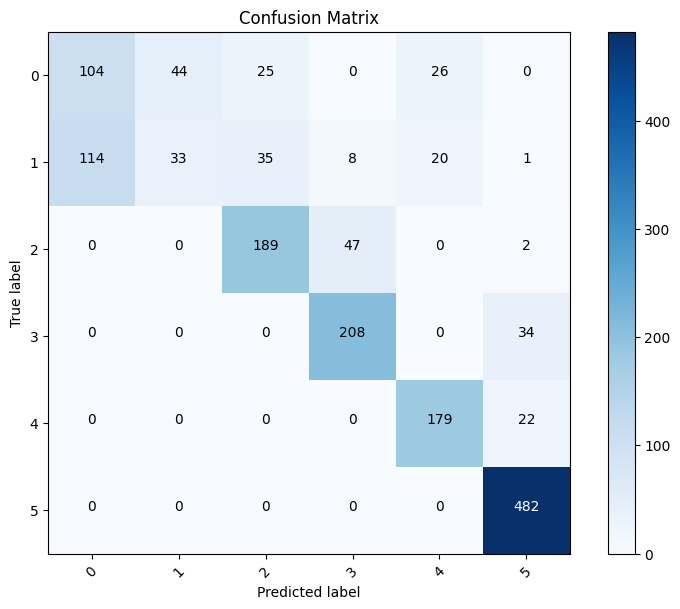

In [52]:
evaluate_model(svm, X_train, y_train, X_test, y_test, y_pred_svm)

### Comparing Different Models

In [53]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'XGBClassifier'
    ],

    'Training Accuracy':
    [svm_train,log_train,  dt_train, rf_train, xgb_train],

    'Model Accuracy Score': [
        svm_accuracy,log_accuracy, dt_accuracy, rf_accuracy,
        xgb_accuracy
    ]
})

In [54]:
def sort_models_by_accuracy(models):
    """
    Sorts the DataFrame of models based on the 'Model Accuracy Score' column.

    Parameters:
    - models: DataFrame containing 'Model', 'Training Accuracy', and 'Model Accuracy Score' columns.

    Returns:
    - A sorted DataFrame based on 'Model Accuracy Score' in descending order.
    """
    return models.sort_values(by='Model Accuracy Score', ascending=False)



In [55]:
compare_models = sort_models_by_accuracy(models)
compare_models

,Model,Training Accuracy,Model Accuracy Score
2,Random Forest,100.00,89.64
3,Decision Tree,100.00,88.81
4,XGBClassifier,92.88,82.84
0,Support Vector Machines,76.05,75.97
1,Logistic Regression,35.80,35.92


In [56]:
prediction_log = logreg.predict(X_test)
prediction_dt = dt.predict(X_test)
prediction_rf = rf.predict(X_test)
prediction_svm = svm.predict(X_test)
prediction_xgb = xgb.predict(X_test)

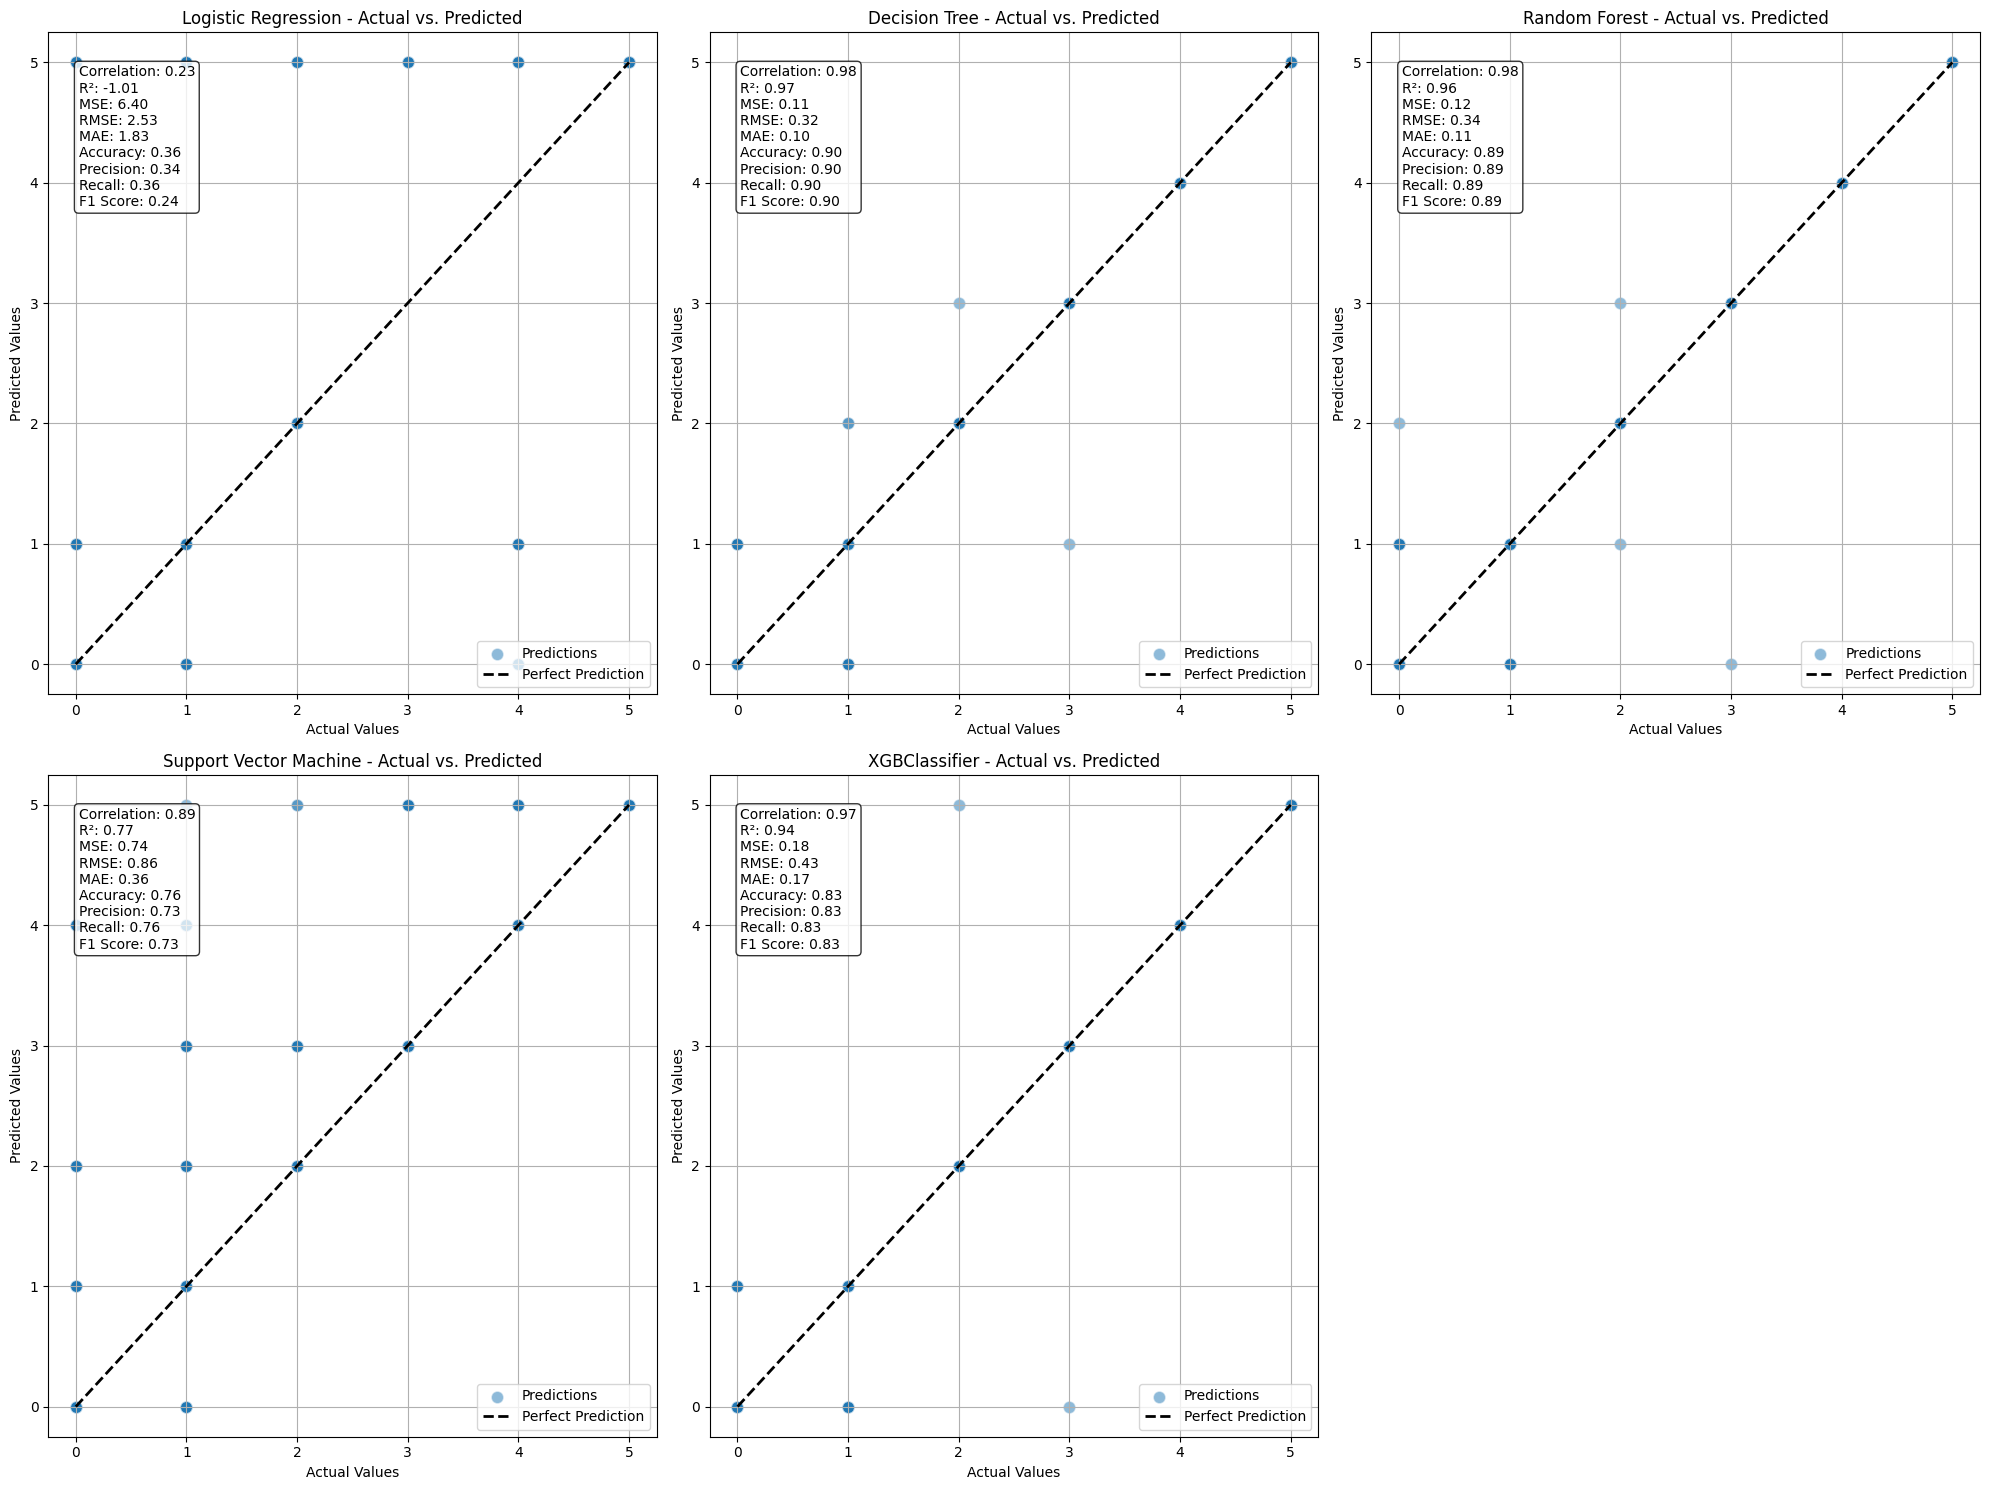


Model Performance Summary:
--------------------------
Model                Corr     R²       MSE      RMSE     MAE      Accuracy Precision Recall   F1      
----------------------------------------------------------------------------------------------------
Logistic Regression  0.23     -1.01    6.40     2.53     1.83     0.36     0.34     0.36     0.24    
Decision Tree        0.98     0.97     0.11     0.32     0.10     0.90     0.90     0.90     0.90    
Random Forest        0.98     0.96     0.12     0.34     0.11     0.89     0.89     0.89     0.89    
Support Vector Machine 0.89     0.77     0.74     0.86     0.36     0.76     0.73     0.76     0.73    
XGBClassifier        0.97     0.94     0.18     0.43     0.17     0.83     0.83     0.83     0.83    


In [86]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score

def plot_actual_vs_predicted(y_test, predictions, model_names):
    """
    Plots actual vs. predicted values for multiple models with detailed insights and metrics.

    Parameters:
    - y_test: True labels for the test data.
    - predictions: Dictionary with model names as keys and their predictions as values.
    - model_names: List of model names corresponding to the predictions.
    """
    plt.figure(figsize=(20, 15))

    for i, name in enumerate(model_names):
        plt.subplot(2, 3, i + 1)
        y_pred = predictions[name]

        # Scatter plot of actual vs. predicted values
        plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='w', s=80, label='Predictions')

        # Plotting the diagonal line (perfect prediction line)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')

        # Calculate metrics
        correlation = np.corrcoef(y_test, y_pred)[0, 1]
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)

        # For classification metrics, round predictions to nearest integer
        y_pred_rounded = np.round(y_pred).astype(int)
        accuracy = accuracy_score(y_test, y_pred_rounded)
        precision = precision_score(y_test, y_pred_rounded, average='weighted')
        recall = recall_score(y_test, y_pred_rounded, average='weighted')
        f1 = f1_score(y_test, y_pred_rounded, average='weighted')

        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'{name} - Actual vs. Predicted')

        # Display metrics
        metrics_text = f'Correlation: {correlation:.2f}\n' \
                       f'R²: {r2:.2f}\n' \
                       f'MSE: {mse:.2f}\n' \
                       f'RMSE: {rmse:.2f}\n' \
                       f'MAE: {mae:.2f}\n' \
                       f'Accuracy: {accuracy:.2f}\n' \
                       f'Precision: {precision:.2f}\n' \
                       f'Recall: {recall:.2f}\n' \
                       f'F1 Score: {f1:.2f}'

        plt.text(0.05, 0.95, metrics_text, transform=plt.gca().transAxes,
                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Add grid and legend
        plt.grid(True)
        plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

    # Print a summary table of all metrics
    print("\nModel Performance Summary:")
    print("--------------------------")
    headers = ["Model", "Corr", "R²", "MSE", "RMSE", "MAE", "Accuracy", "Precision", "Recall", "F1"]
    print("{:<20} {:<8} {:<8} {:<8} {:<8} {:<8} {:<8} {:<8} {:<8} {:<8}".format(*headers))
    print("-" * 100)

    for name in model_names:
        y_pred = predictions[name]
        y_pred_rounded = np.round(y_pred).astype(int)

        corr = np.corrcoef(y_test, y_pred)[0, 1]
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred_rounded)
        precision = precision_score(y_test, y_pred_rounded, average='weighted')
        recall = recall_score(y_test, y_pred_rounded, average='weighted')
        f1 = f1_score(y_test, y_pred_rounded, average='weighted')

        print("{:<20} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f} {:<8.2f}".format(
            name, corr, r2, mse, rmse, mae, accuracy, precision, recall, f1))

# Example usage:
predictions = {
    'Logistic Regression': logreg.predict(X_test),
    'Decision Tree': dt.predict(X_test),
    'Random Forest': rf.predict(X_test),
    'Support Vector Machine': svm.predict(X_test),
    'XGBClassifier': xgb.predict(X_test)
}

plot_actual_vs_predicted(y_test, predictions, list(predictions.keys()))

#### 6. LSTM modeling

In [66]:
df_lstm = df_new.copy()
df_lstm.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


In [67]:
df_lstm.drop(['G', 'C', 'B', 'A'], axis=1, inplace=True)

In [68]:
df_lstm['Fault_Type'] = encoder.fit_transform(df_lstm['Fault_Type'])
df_lstm.head()

,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df_lstm.copy()
df_scaled[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']] = scaler.fit_transform(df[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']])
df_scaled

,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,0.413869,0.497571,0.543058,0.839985,0.384404,0.284358,3
1,0.309366,0.460370,0.505251,0.767607,0.391930,0.349258,3
2,0.215144,0.405429,0.449635,0.728956,0.399481,0.380317,3
3,0.163683,0.381381,0.424998,0.704108,0.407055,0.397513,3
4,0.135580,0.377775,0.420857,0.682749,0.414650,0.411189,3
...,...,...,...,...,...,...,...
7856,0.461942,0.524456,0.508940,0.588089,0.045309,0.882445,5
7857,0.462161,0.523902,0.509278,0.595783,0.042747,0.877341,5
7858,0.462389,0.523347,0.509609,0.603454,0.040299,0.872144,5
7859,0.462624,0.522792,0.509933,0.611100,0.037966,0.866856,5


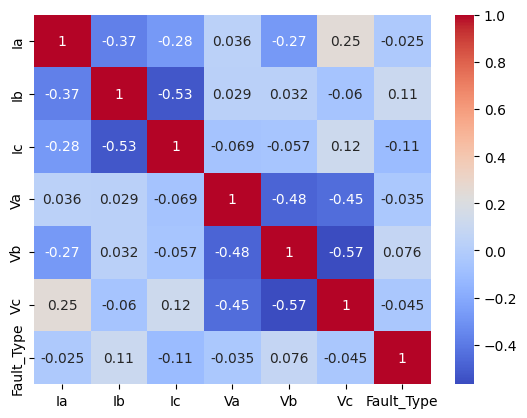

In [70]:
df_lstm_corr = df_scaled.corr()
sns.heatmap(df_lstm_corr, annot=True, cmap='coolwarm')
plt.show()

In [71]:
def df_to_X_y3(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][6]]
    y.append(label)
  return np.array(X), np.array(y)

In [72]:
X1, y1 = df_to_X_y3(df_scaled)
X1.shape, y1.shape

((7856, 5, 7), (7856, 1))

In [73]:
X1_train, y1_train = X1[:5500], y1[:5500]
X1_val, y1_val = X1[5500:6680], y1[5500:6680]
X1_test, y1_test = X1[6680:], y1[6680:]
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape

((5500, 5, 7), (5500, 1), (1180, 5, 7), (1180, 1), (1176, 5, 7), (1176, 1))

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential()

# Input layer with the correct input shape (5 time steps, 7 features)
model.add(InputLayer(input_shape=(5, 7)))

# LSTM layer with more units and return_sequences=True to allow stacking
model.add(LSTM(128, return_sequences=False))

# Adding a Dropout layer for regularization
model.add(Dropout(0.3))

# Dense hidden layer with ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer with a single unit (since you're predicting one value, fault type)
model.add(Dense(1, activation='linear'))

# Summary of the model
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 128)                 │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,953 (304.50 KB)

 Trainable params: 77,953 (304.50 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
cp1 = ModelCheckpoint('model/.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [109]:
model.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=10, batch_size=64, callbacks=[cp1])

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4.3454 - root_mean_squared_error: 2.0729 - val_loss: 1.8789 - val_root_mean_squared_error: 1.3707
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1524 - root_mean_squared_error: 0.3876 - val_loss: 0.2033 - val_root_mean_squared_error: 0.4509
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0797 - root_mean_squared_error: 0.2820 - val_loss: 0.1074 - val_root_mean_squared_error: 0.3277
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0556 - root_mean_squared_error: 0.2351 - val_loss: 0.0657 - val_root_mean_squared_error: 0.2564
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0737 - root_mean_squared_error: 0.2685 - val_loss: 0.0853 - val_root_mean_squared_error: 0.2920
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0509 - root_mean_squared_error: 0.2251 - val_loss: 0.0782 - val_root_mean_squared_error: 0.2796
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss:

In [110]:
from tensorflow.keras.models import load_model
model = load_model('model/.keras')

In [123]:
train_predictions = model.predict(X1_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions.round(1), 'Actuals':y1_train.flatten()})
train_results

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


,Train Predictions,Actuals
0,3.1,3.0
1,3.1,3.0
2,3.1,3.0
3,3.1,3.0
4,3.1,3.0
...,...,...
5495,4.0,5.0
5496,4.8,5.0
5497,4.8,5.0
5498,4.8,5.0


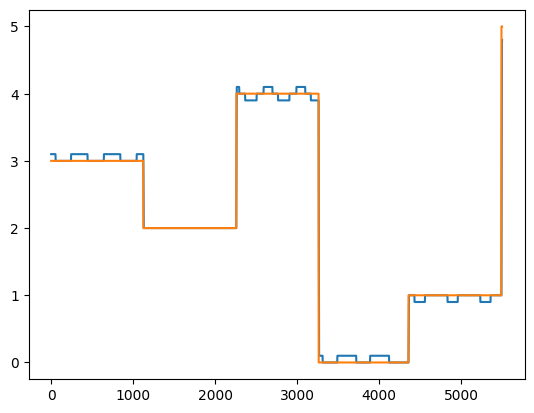

In [124]:
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [126]:
val_predictions = model.predict(X1_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions.round(1), 'Actuals':y1_val.flatten()})
val_results

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Val Predictions,Actuals
0,4.8,5.0
1,4.8,5.0
2,4.8,5.0
3,4.8,5.0
4,4.8,5.0
...,...,...
1175,4.8,5.0
1176,4.8,5.0
1177,4.8,5.0
1178,4.8,5.0


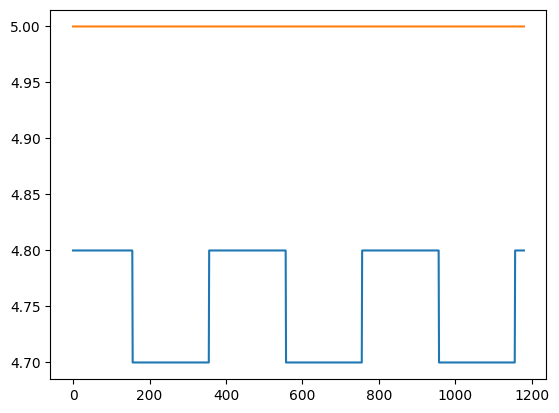

In [127]:
plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])

In [128]:
test_predictions = model.predict(X1_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions.round(1), 'Actuals':y1_test.flatten()})
test_results

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Test Predictions,Actuals
0,4.8,5.0
1,4.8,5.0
2,4.8,5.0
3,4.8,5.0
4,4.8,5.0
...,...,...
1171,4.7,5.0
1172,4.7,5.0
1173,4.7,5.0
1174,4.7,5.0


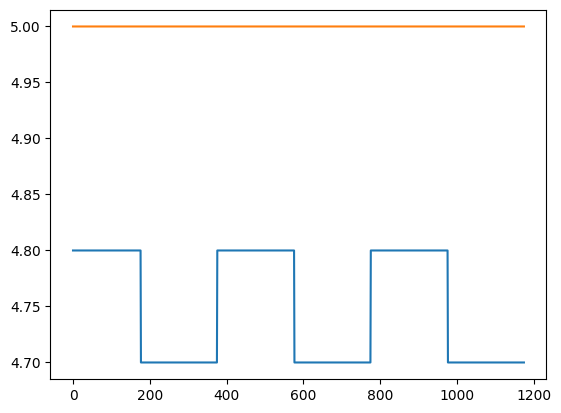

In [129]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Function to evaluate metrics for regression
def evaluate_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    correlation = np.corrcoef(y_true, y_pred)[0, 1]

    print(f"Correlation: {correlation:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")



In [131]:
evaluate_regression_metrics(y1_train.flatten(), train_predictions)

Correlation: 0.9950
R²: 0.9900
MSE: 0.0195
RMSE: 0.1396
MAE: 0.0508
